In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [44]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [27]:
df = pd.read_csv("onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [5]:
df.duplicated().sum()

103

In [28]:
df.drop_duplicates(inplace=True)

In [7]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


In [12]:
for col in df.columns:
  col_values = df[col].unique()
  print("--------------------")
  if len(col_values) <10:
    print(f"Col: {col}")
    print(f"Col values: {col_values}")
  else:
    print(f"{col} > 10")

--------------------
Age > 10
--------------------
Col: Gender
Col values: ['Female' 'Male']
--------------------
Col: Marital Status
Col values: ['Single' 'Married' 'Prefer not to say']
--------------------
Col: Occupation
Col values: ['Student' 'Employee' 'Self Employeed' 'House wife']
--------------------
Col: Monthly Income
Col values: ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
--------------------
Col: Educational Qualifications
Col values: ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
--------------------
Col: Family size
Col values: [4 3 6 2 5 1]
--------------------
latitude > 10
--------------------
longitude > 10
--------------------
Pin code > 10
--------------------
Col: Output
Col values: ['Yes' 'No']
--------------------
Col: Feedback
Col values: ['Positive' 'Negative ']
--------------------
Col: Unnamed: 12
Col values: ['Yes' 'No']


In [29]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x.strip() == "Male" else 0)
df["Feedback"] = df["Feedback"].apply(lambda x: 1 if x.strip() == "Positive" else 0)
df["Marital Status"] = df["Marital Status"].apply(lambda x: 0 if x.strip() == "Single" else 1 if x.strip() == "Married" else 2)
df["Occupation"] = df["Occupation"].apply(lambda x: 0 if x.strip() == "Student" else 1 if x.strip() == "Employee" else 2)
df["Educational Qualifications"] = df["Educational Qualifications"].apply(lambda x: 0 if x.strip() == "Post Graduate" else 1 if x.strip() == "Graduate' 'Ph.D" else 2)
df["Monthly Income"] = df["Monthly Income"].apply(lambda x: 0 if x.strip() == "No Income" else 1 if x.strip() == "Below Rs.10000" else 2 if x.strip() == "More than 50000" else 3)
df["Output"] = df["Output"].apply(lambda x: 1 if x.strip() == "Yes" else 0)

In [31]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,0,0,0,0,4,12.9766,77.5993,560001,1,1,Yes
1,24,0,0,0,1,2,3,12.9770,77.5773,560009,1,1,Yes
2,22,1,0,0,1,0,3,12.9551,77.6593,560017,1,0,Yes
3,22,0,0,0,0,2,6,12.9473,77.5616,560019,1,1,Yes
4,22,1,0,0,1,0,4,12.9850,77.5533,560010,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,1,0,0,0,2,2,13.0012,77.5995,560046,0,1,No
363,31,1,1,1,2,2,3,12.9306,77.5434,560085,1,1,Yes
369,30,1,1,1,2,0,6,12.9369,77.6407,560095,1,1,Yes
374,21,1,0,0,0,2,3,13.0641,77.5931,560092,1,0,Yes


In [32]:
df.drop(['Unnamed: 12'], axis=1, inplace=True)

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/3941431007.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/3941431007.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/3941431007.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/3941431007.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/3941431007.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/3941431007.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_33884/39414

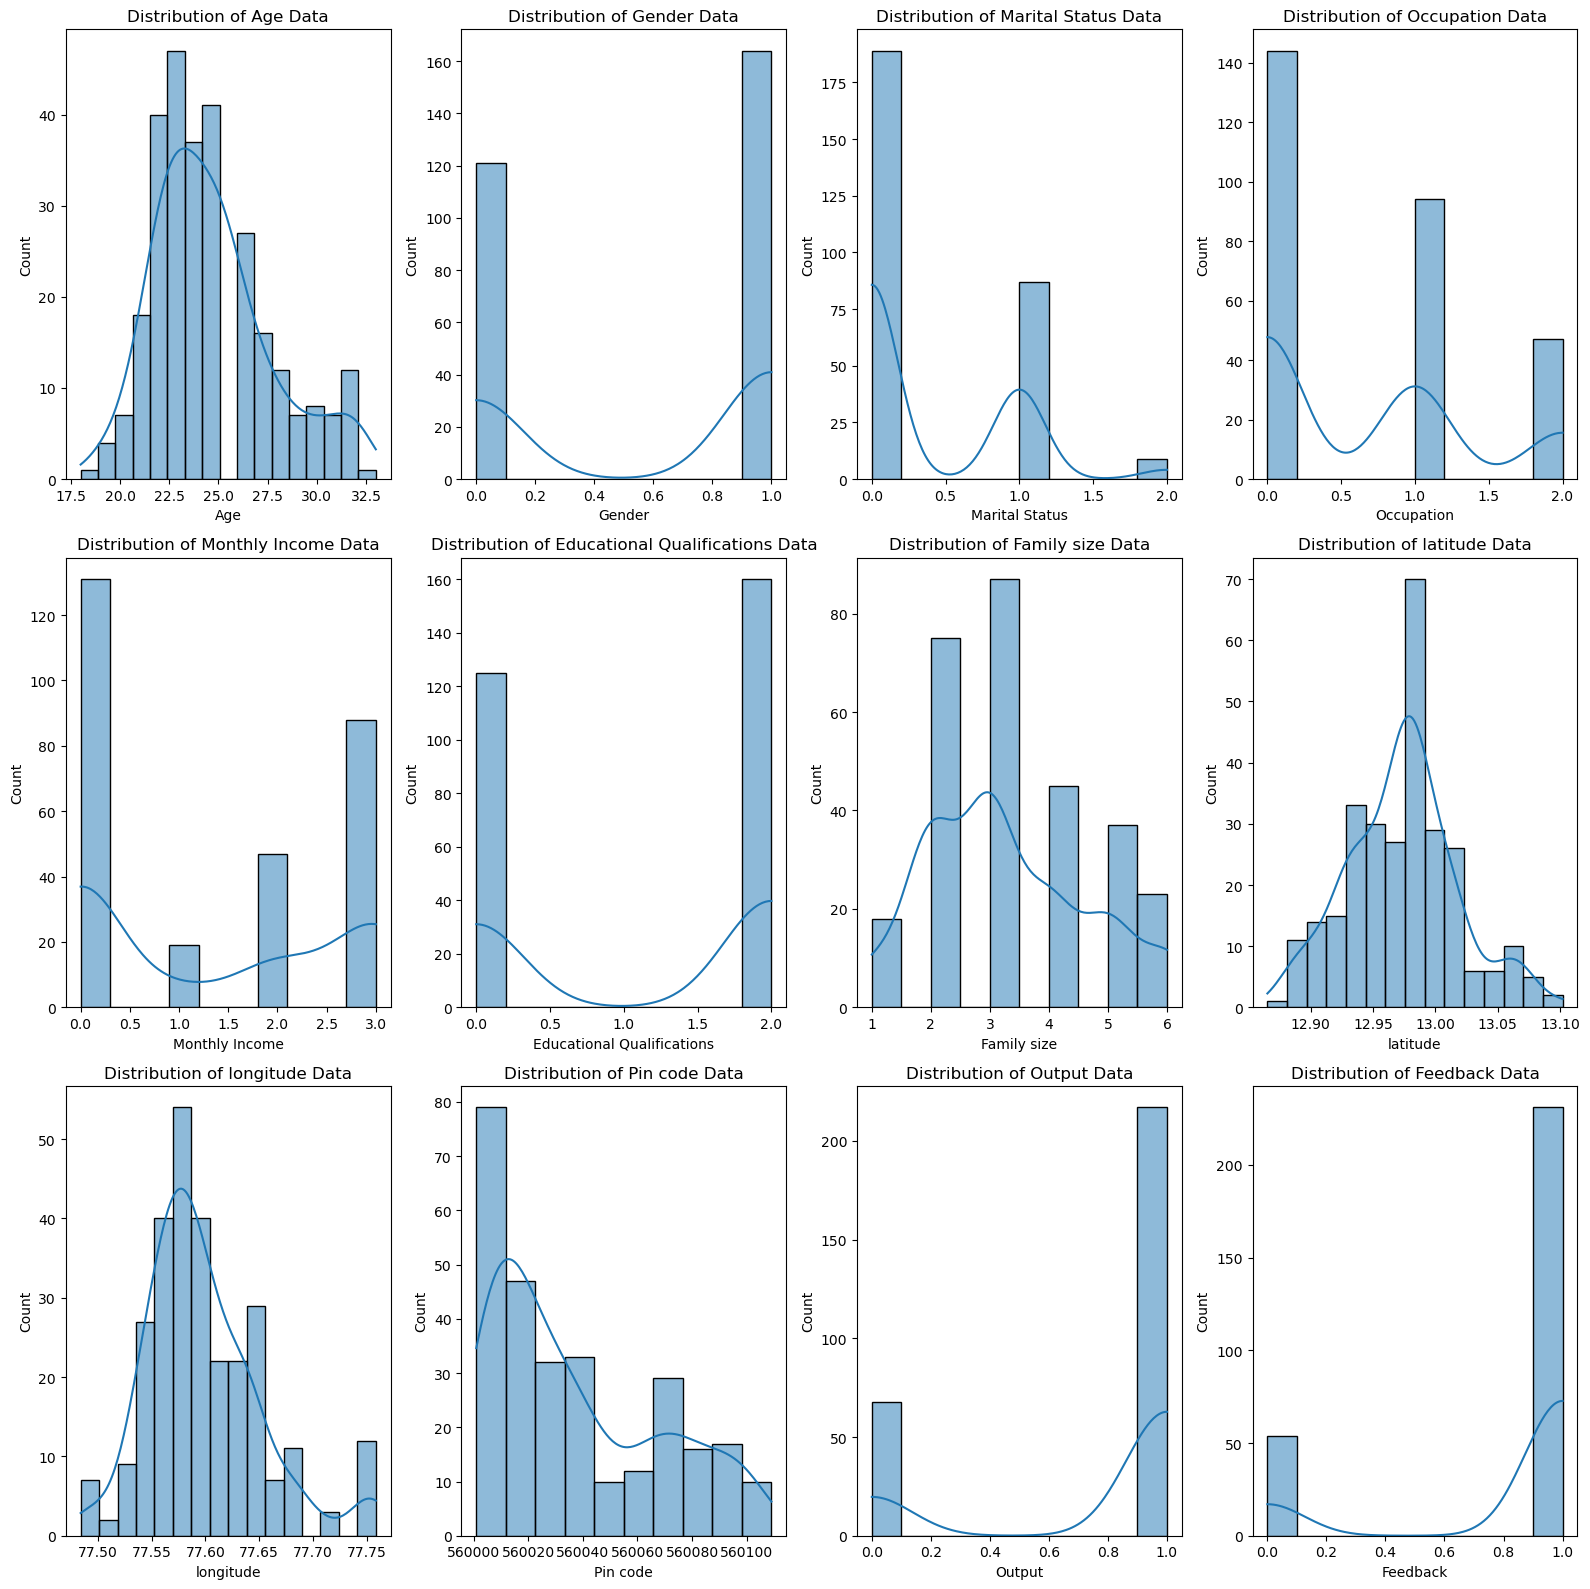

In [33]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

In [45]:
X, y = df.drop("Output", axis=1), df["Output"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

2/2 [==============================] - 0s 1ms/step


,Model,Accuracy
0,LogisticRegression,0.859649
1,SVC,0.859649
2,DecisionTreeClassifier,0.824561
3,RandomForestClassifier,0.842105
4,KNeighborsClassifier,0.824561
5,GradientBoostingClassifier,0.859649
6,GaussianNB,0.859649
7,Sequential,0.824561


In [46]:
X, y = df.drop("Output", axis=1), df["Output"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

2/2 [==============================] - 0s 904us/step


,Model,Accuracy
0,LogisticRegression,0.842105
1,SVC,0.859649
2,DecisionTreeClassifier,0.824561
3,RandomForestClassifier,0.842105
4,KNeighborsClassifier,0.824561
5,GradientBoostingClassifier,0.859649
6,GaussianNB,0.859649
7,Sequential,0.859649


In [47]:
X, y = df.drop("Output", axis=1), df["Output"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

LogisticRegression() Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.86      0.98      0.91        44

    accuracy                           0.86        57
   macro avg       0.86      0.72      0.76        57
weighted avg       0.86      0.86      0.84        57



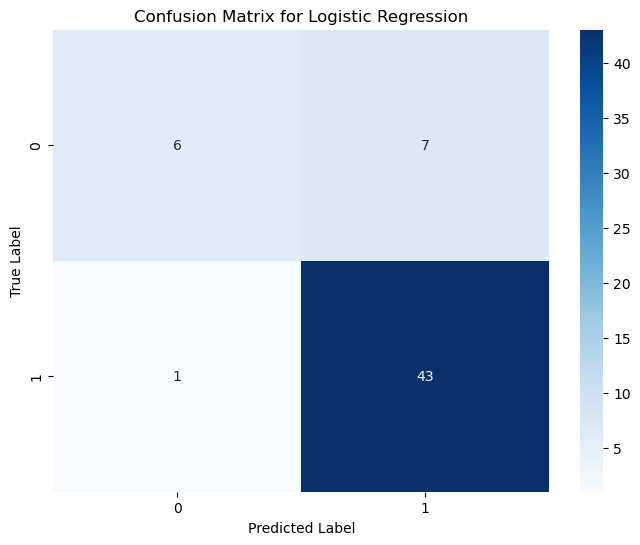

In [52]:
# Logistc Regression
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_encoded)
predictions = LR.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"{LR} Classification Report:\n", classification_report(y_test_encoded, predictions))
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVC() Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.86      0.98      0.91        44

    accuracy                           0.86        57
   macro avg       0.86      0.72      0.76        57
weighted avg       0.86      0.86      0.84        57



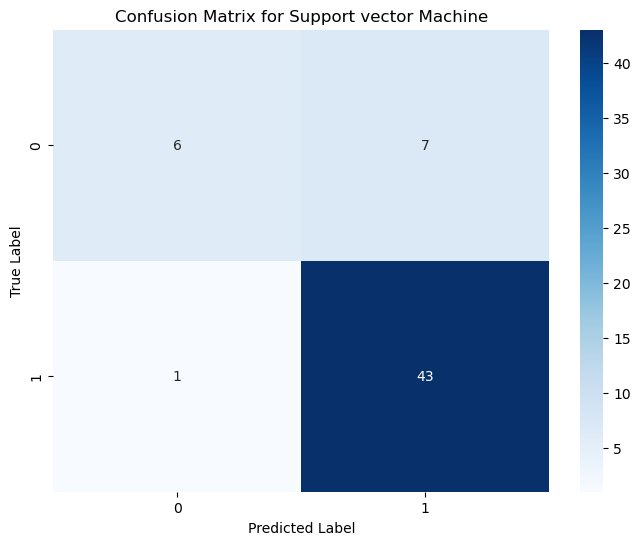

In [54]:
# Logistc Regression
SVM = SVC()
SVM.fit(X_train_scaled, y_train_encoded)
predictions = SVM.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, predictions)
report = classification_report(y_test_encoded, predictions, output_dict=True)
print(f"{SVM} Classification Report:\n", classification_report(y_test_encoded, predictions))
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Support vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

DecisionTreeClassifier() Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.81      0.89      0.85        44

    accuracy                           0.75        57
   macro avg       0.63      0.60      0.61        57
weighted avg       0.73      0.75      0.74        57



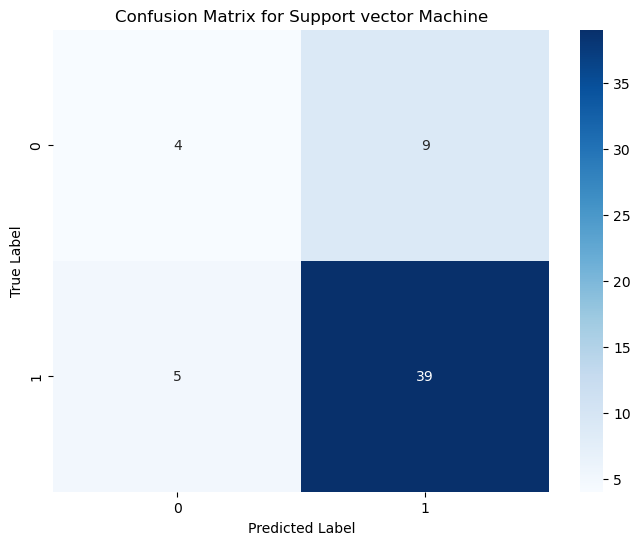

In [56]:
# Decsion Tree
DTC = DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train_encoded)
predictions = DTC.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"{DTC} Classification Report:\n", classification_report(y_test_encoded, predictions))
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


GaussianNB() Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.88      0.95      0.91        44

    accuracy                           0.86        57
   macro avg       0.83      0.75      0.77        57
weighted avg       0.85      0.86      0.85        57



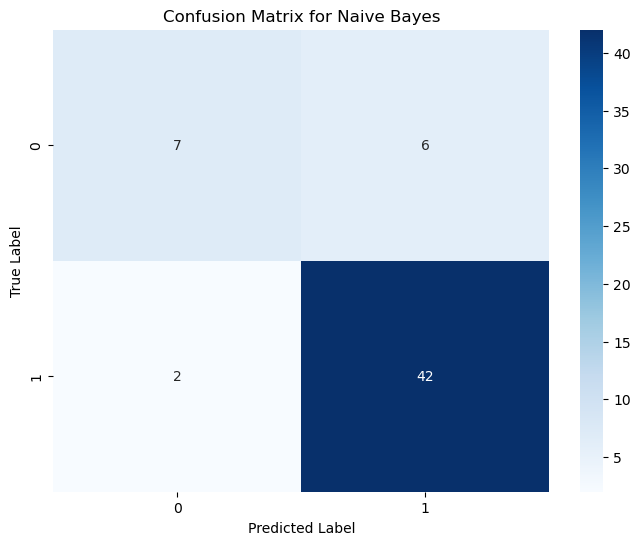

In [58]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train_scaled, y_train_encoded)
predictions = NB.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"{NB} Classification Report:\n", classification_report(y_test_encoded, predictions))
# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

GradientBoostingClassifier() classification report
                precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.86      0.98      0.91        44

    accuracy                           0.86        57
   macro avg       0.86      0.72      0.76        57
weighted avg       0.86      0.86      0.84        57



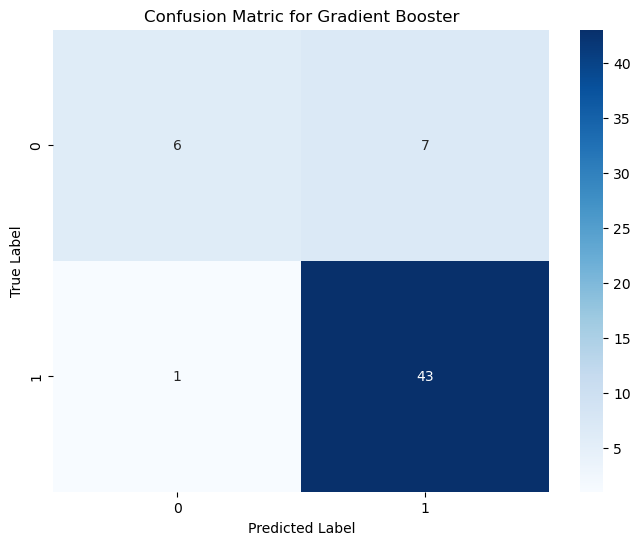

In [61]:
GBD = GradientBoostingClassifier()
GBD.fit(X_train_scaled, y_train_encoded)
predictions = GBD.predict(X_test_scaled)
accuracy = accuracy_score(predictions, y_test_encoded)
print(f"{GBD} classification report\n  {classification_report(y_test_encoded, predictions)}")

cm = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(data=cm, annot=True, fmt='g', cmap="Blues")
plt.title("Confusion Matric for Gradient Booster")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()